In [16]:
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs

# Generate sample data (replace this with your own data)
X, _ = make_blobs(n_samples=1000, centers=8, n_features=80, random_state=42)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=8, init='k-means++')
cluster_labels = kmeans.fit_predict(X)

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Add cluster labels and original features to the data
data = np.hstack((X_tsne, np.expand_dims(cluster_labels, axis=1), X))

# Create DataFrame for Plotly
import pandas as pd
df = pd.DataFrame(data, columns=['t-SNE Component 1', 't-SNE Component 2', 'Cluster'] + [f'Feature {i+1}' for i in range(X.shape[1])])

# Define hover template
hover_template = '<b>Cluster:</b> %{customdata[2]}'

# Plot t-SNE visualization with hover labels
fig = px.scatter(df, x='t-SNE Component 1', y='t-SNE Component 2', color='Cluster', hover_name='Cluster', hover_data=df.columns[3:])

# Update hover template
fig.update_traces(hoverinfo='text', hovertemplate=hover_template)

fig.show()

In [14]:
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs

# Generate sample data (replace this with your own data)
X, _ = make_blobs(n_samples=1000, centers=8, n_features=80, random_state=42)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=8, init='k-means++')
cluster_labels = kmeans.fit_predict(X)

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Add cluster labels and original features to the data
data = np.hstack((X_tsne, np.expand_dims(cluster_labels, axis=1), X))

# Create DataFrame for Plotly
import pandas as pd
df = pd.DataFrame(data, columns=['t-SNE Component 1', 't-SNE Component 2', 'Cluster'] + [f'Feature {i+1}' for i in range(X.shape[1])])

# Define hover template
hover_template = '<b>Cluster:</b> %{customdata[2]}'

# Get feature names
feature_names = df.columns[3:]

# Update hover template to include feature names and values
for i, feature in enumerate(feature_names):
    hover_template += f"<br><b>{feature}:</b> %{{customdata[{i + 3}]}}"

# Plot t-SNE visualization with hover labels
fig = px.scatter(df, x='t-SNE Component 1', y='t-SNE Component 2', color='Cluster', hover_name='Cluster', hover_data=df.columns[3:])

# Update hover template
fig.update_traces(hoverinfo='text', hovertemplate=hover_template)

fig.show()



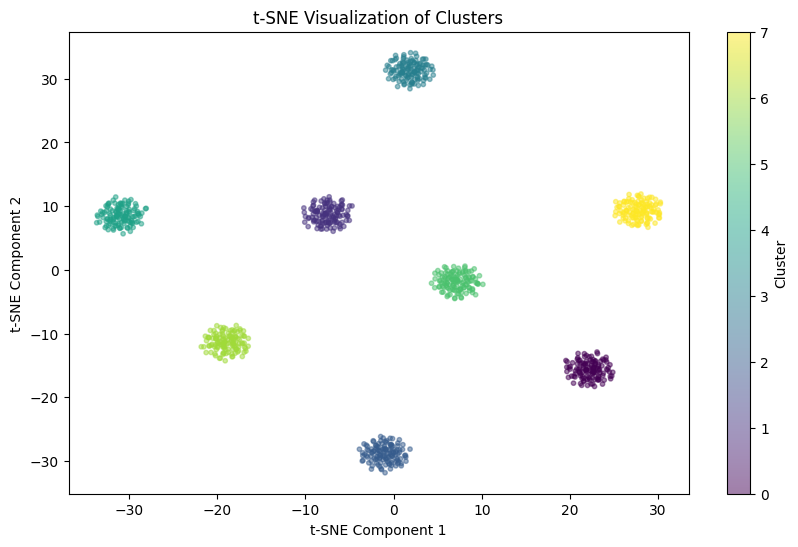

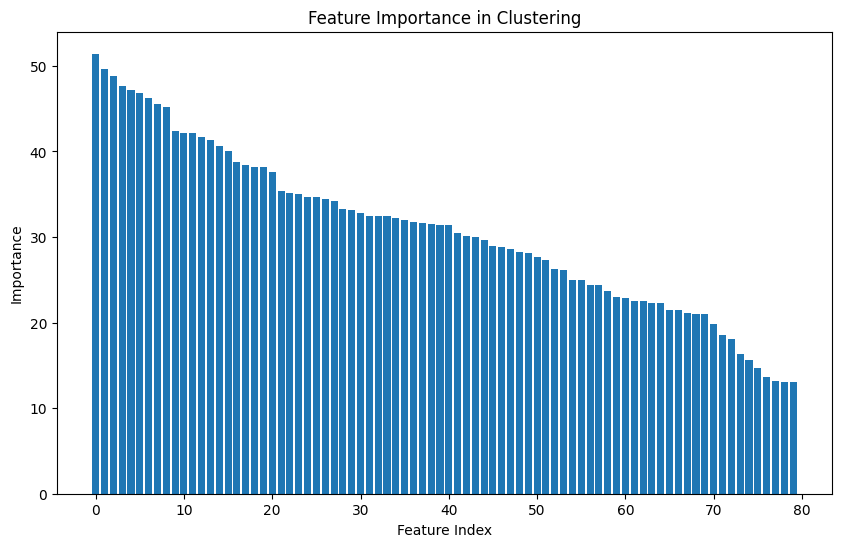

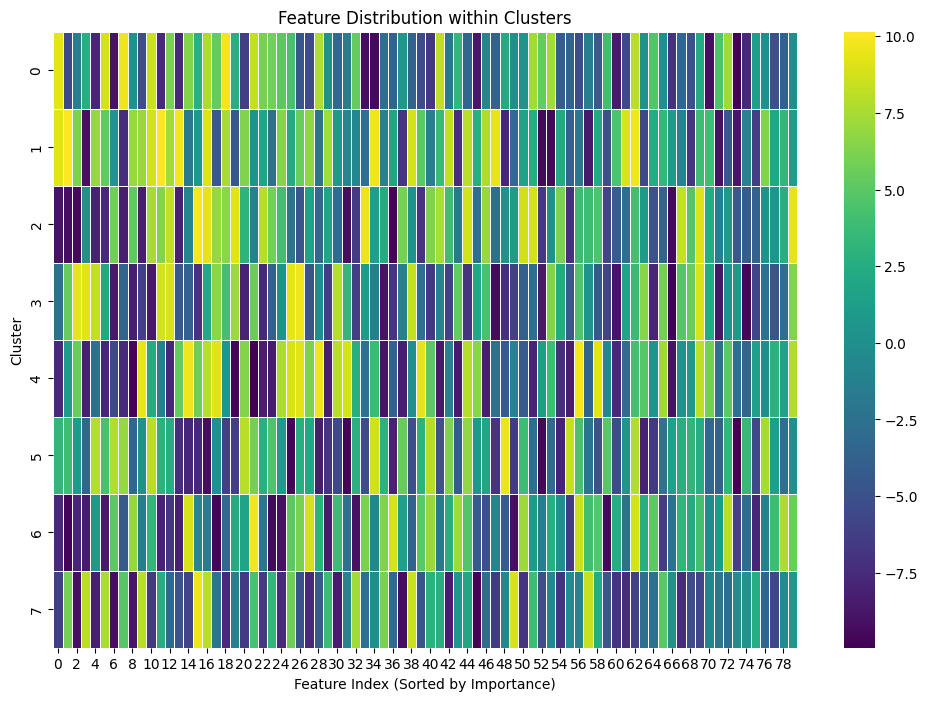

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs

# Generate sample data (replace this with your own data)
X, _ = make_blobs(n_samples=1000, centers=8, n_features=80, random_state=42)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=8, init='k-means++')
cluster_labels = kmeans.fit_predict(X)

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE reduced data with cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', s=10, alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Feature importance ranking
cluster_means = []
for i in range(kmeans.n_clusters):
    cluster_data = X[cluster_labels == i]
    cluster_mean = np.mean(cluster_data, axis=0)
    cluster_means.append(cluster_mean)

# Calculate importance as variance within each cluster
importances = np.var(cluster_means, axis=0)

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.title('Feature Importance in Clustering')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(np.array(cluster_means)[:, sorted_indices], cmap='viridis', linewidths=0.5)
plt.title('Feature Distribution within Clusters')
plt.xlabel('Feature Index (Sorted by Importance)')
plt.ylabel('Cluster')
plt.show()